In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [24]:
#**************************************************************************************************************************	
	
	
#  different types of utility functions used for various univariate analysis (monks advanced method for univariate analysis)
from matplotlib import pyplot as plt
import seaborn as sns


def plot(x=None, y=None, hue=None, data=None,name='',barplot=False,countplot=False,boxplot=True,factorplot=False):
    data=pd.DataFrame(data)
    plt.figure(figsize=(14,9))
    if type(data[x].values[1])==str:
        from sklearn.preprocessing import LabelEncoder
        le=LabelEncoder()
        data[x]=data[x].apply(lambda y:treat_cat(y))
        data[x]=le.fit_transform(data[x])
    else:
        me=np.mean(data[x])
        data[x]=data[x].apply(lambda y: treat_num(y,m=me))
    try:
        print(name,'\n')
        data[x].hist()
        plt.show()
    except:
        print('cannot plot histogram\n')
    
    try:
        print(name,'\n')
        sns.distplot(train[x])
        plt.show()
    except:
        print('cannot plot distplot\n')
        
    if barplot:
        try:
            print(name,'\n')
            sns.barplot(x=x,y=y,hue=hue,data=data)
            plt.xlabel(x)
            plt.ylabel(y)
            plt.show()
        except:
            print('cannot plot barplot\n')
    if countplot:        
        try:
            print(name,'\n')
            sns.countplot(data[x])
            plt.xlabel(x)
            plt.ylabel(y)
            plt.show()
        except:
            print('cannot plot countplot\n')
    if boxplot:        
        try:
            print(name,'\n')
            sns.boxplot(x=x,y=y,hue=hue,data=data)
            plt.xlabel(x)
            plt.ylabel(y)
            plt.show()
        except:
            print('cannot plot boxplot\n')  
    if factorplot:        
        try:
            print(name,'\n')
            data=pd.DataFrame(data)
            sns.factorplot(x=x,y=y,data=data,size=14)
            plt.xlabel(x)
            plt.ylabel(y)
            plt.show()
        except:
            print('cannot plot factorplot\n')  
            
def plotHeatMap(df, size=(16,9),an=True):
    plt.figure(figsize=size)
    cmap = plt.cm.viridis
    sns.heatmap(df.corr(),cmap=cmap,linewidths=0.2,vmax=1, linecolor="white", square=True,annot=an)
    plt.show()
    
def treat_cat(tmp):
    if tmp!=tmp:
        return 'unknown'
    else:
        return tmp
    
def max_min(data):
    data=pd.DataFrame(data)
    print('max = '+str(max(data.values.ravel()))+'  min = '+str(min(data.values.ravel())))

def data_type(data):
    data=pd.DataFrame(data)
    for i in data.values.ravel():
        if i==i:
            return type(i)

			
# ======================================================================================================
# ======================================================================================================
#**************************************************************************************************************************	

#	best method for univariate analysis			

def describe(data,x=None, y=None, with_plot=True):
    data = data.copy()
    null_values(data[x])
    #for uniqueness
    try:
        if len(set(data[x].values))==len(data[x].values):
            print('is_unique : Yes')
        else:
            print('is_unique : No')
    except:
        pass
    
    no_of_unique_values(data[x])
    if len(set(data[x].values.ravel()))<=10:
        print(set(data[x].values.ravel()))
        count(data=data[x])
        
    if data_type(data[x])==str:
        from sklearn.preprocessing import LabelEncoder
        le=LabelEncoder()
        data[x]=data[x].apply(lambda y:treat_cat(y))
        data[x]=le.fit_transform(data[x])
    else:
        me=np.mean(data[x])
        data[x]=data[x].apply(lambda y: treat_num(y,m=me))
    data[x]=pd.DataFrame(data[x])
    max_min(data[x])
    non_zero(data[x])
    print(data[x].describe(),'\n')
    if with_plot:
        plot(x=x,data=data,y=y)



# ======================================================================================================
# ======================================================================================================
#**************************************************************************************************************************	
		
def non_zero(data):
    data=pd.DataFrame(data)
    print('non zero values = '+str(len(data[data.values.ravel()!=0]))+
         '   zero values = '+str(len(data[data.values.ravel()==0])))

def drop(data=None,col=None):
    return data.drop([i for i in col],axis=1)
    
def null_values(data):
     print('null values = '+str(len(data[data!=data])))
        
def treat_num(x,m):
    if x!=x:
        return m
    else:
        return x
 
def no_of_unique_values(data):
    print('Number of unique values : ',len(set(data)))
    
def count(data):
    from collections import Counter
    print(Counter(data))
    
def consider_unknown(data,li):
    if data in li:
        return data
    else :
        return 'unknown'



# ======================================================================================================
# ======================================================================================================
# **************************************************************************************************************************	
		
#	used for outlier detection and removal
 
def show_percentile(x=None,data=None,lb=0,ub=100):
    lb,ub=np.percentile(data[x],q=(lb,ub),axis=0)
    print('sacrifice : ',len(data[x])-len(data[(data[x]>=lb) &(data[x]<=ub)]))
    describe(data[x][(data[x]>=lb) &(data[x]<=ub)])
    
def apply_percentile(x=None,data=None,lb=0,ub=100):
    lb,ub=np.percentile(data[x],q=(lb,ub),axis=0)
    return data[(data[x]>=lb) &(data[x]<=ub)]



In [25]:
train = pd.read_csv('Data/Clean_train_data.csv')
test = pd.read_csv('Data/Clean_test_data.csv')

In [26]:
train.head()

,Year,Month,Country,Product_ID,Sales,Holiday,Expense_Price
0,2013,1,Argentina,1,34346025.00,1,14749.307
1,2013,1,Argentina,2,2751851.48,1,1329.374
2,2013,1,Belgium,2,314850.13,1,249.590
3,2013,1,Columbia,1,7894712.62,2,1893.122
4,2013,1,Columbia,2,5770274.12,2,1436.726


In [27]:
test.head()

,Year,Month,Country,Product_ID,Holiday,Expense_Price
0,2015,11,England,4,0,171.166
1,2015,11,England,5,0,416.969
2,2015,11,Finland,4,0,1306.731
3,2015,12,England,4,3,194.468
4,2015,12,England,5,3,464.351



---------------------------   Year   ----------------------------------
null values = 0
is_unique : No
Number of unique values :  4
{2016, 2013, 2014, 2015}
Counter({2015: 126, 2014: 112, 2013: 108, 2016: 42})
max = 2016  min = 2013
non zero values = 388   zero values = 0
count     388.000000
mean     2014.262887
std         0.984618
min      2013.000000
25%      2013.000000
50%      2014.000000
75%      2015.000000
max      2016.000000
Name: Year, dtype: float64 

 



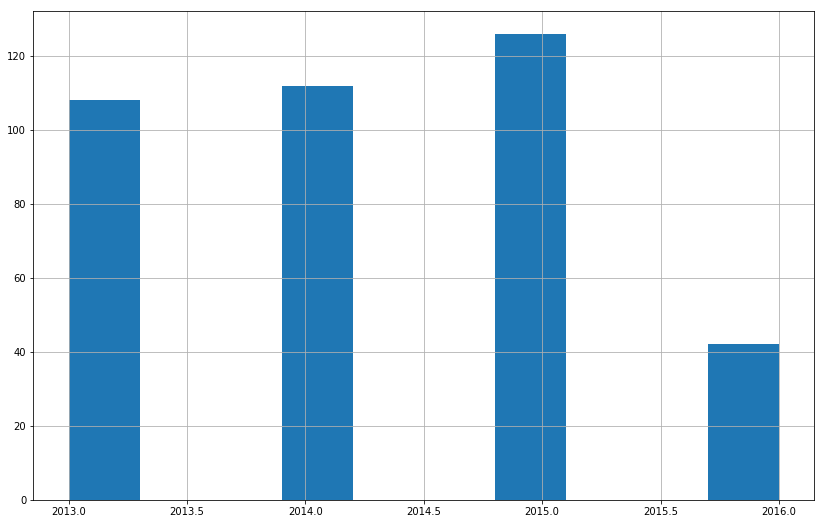

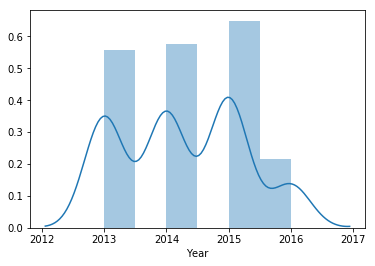

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


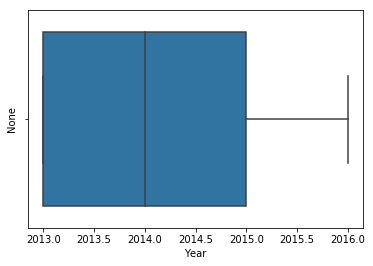

null values = 0
is_unique : No
Number of unique values :  3
{2016, 2017, 2015}
Counter({2016: 75, 2017: 24, 2015: 6})
max = 2017  min = 2015
non zero values = 105   zero values = 0
count     105.000000
mean     2016.171429
std         0.508715
min      2015.000000
25%      2016.000000
50%      2016.000000
75%      2016.000000
max      2017.000000
Name: Year, dtype: float64 

 



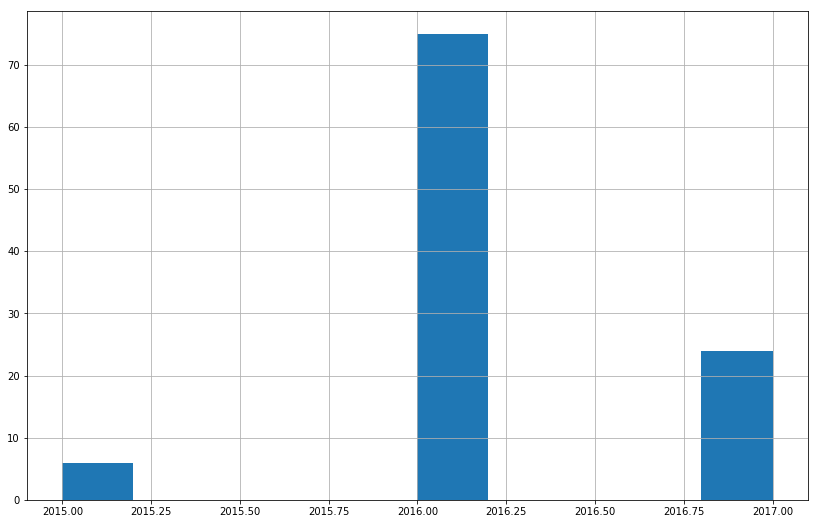

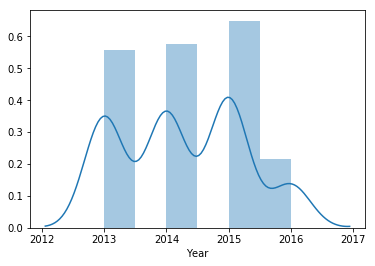

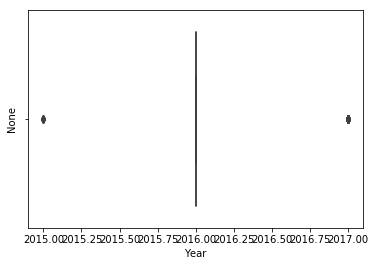


---------------------------   Month   ----------------------------------
null values = 0
is_unique : No
Number of unique values :  12
max = 12  min = 1
non zero values = 388   zero values = 0
count    388.000000
mean       6.255155
std        3.486311
min        1.000000
25%        3.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: Month, dtype: float64 

 



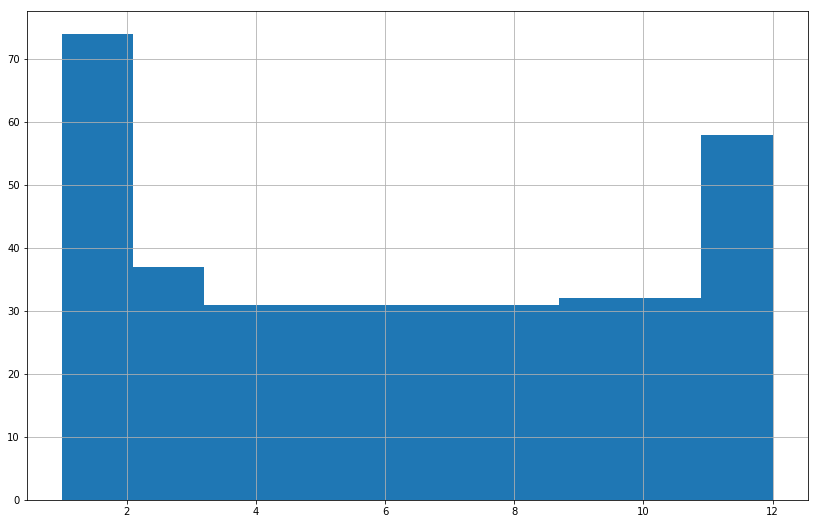

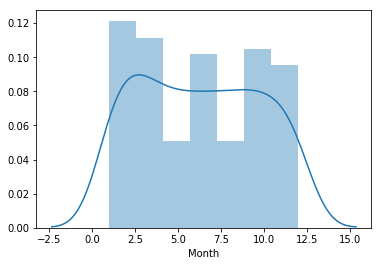

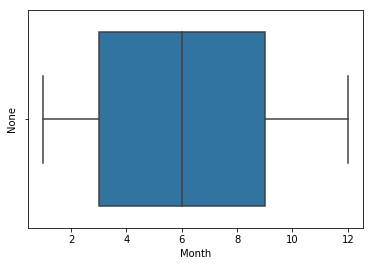

null values = 0
is_unique : No
Number of unique values :  12
max = 12  min = 1
non zero values = 105   zero values = 0
count    105.000000
mean       6.028571
std        3.571945
min        1.000000
25%        3.000000
50%        6.000000
75%        9.000000
max       12.000000
Name: Month, dtype: float64 

 



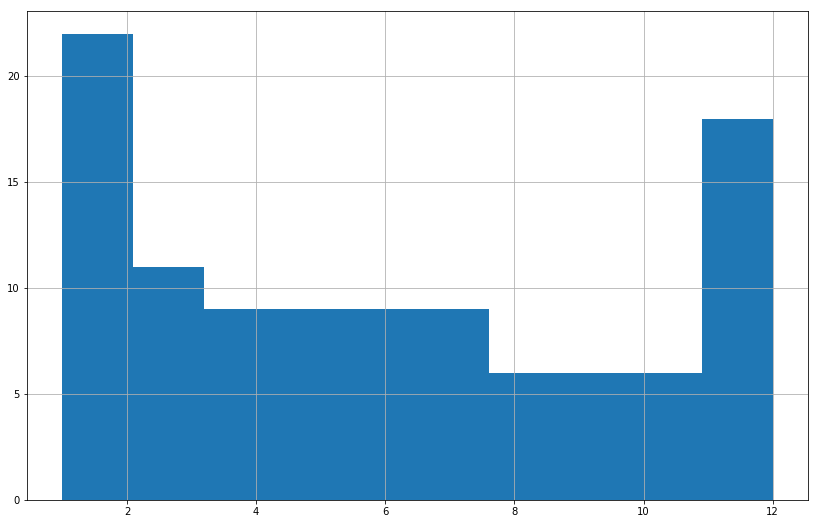

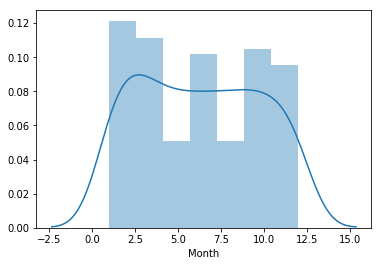

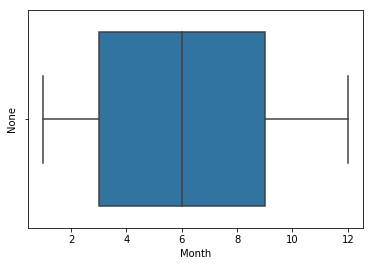


---------------------------   Country   ----------------------------------
null values = 0
is_unique : No
Number of unique values :  6
{'Columbia', 'England', 'Belgium', 'Argentina', 'Denmark', 'Finland'}
Counter({'Columbia': 106, 'Argentina': 102, 'England': 68, 'Belgium': 39, 'Denmark': 39, 'Finland': 34})
max = 5  min = 0
non zero values = 286   zero values = 102
count    388.000000
mean       2.087629
std        1.655794
min        0.000000
25%        0.000000
50%        2.000000
75%        4.000000
max        5.000000
Name: Country, dtype: float64 

 



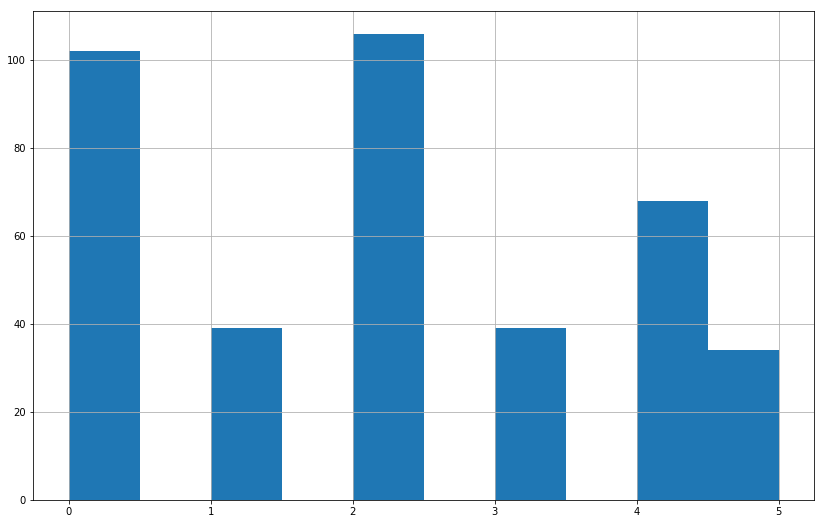

 

cannot plot distplot

 



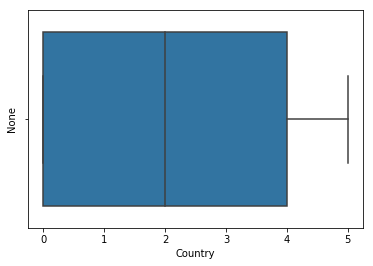

null values = 0
is_unique : No
Number of unique values :  6
{'Columbia', 'England', 'Belgium', 'Argentina', 'Denmark', 'Finland'}
Counter({'Argentina': 27, 'Columbia': 27, 'England': 18, 'Belgium': 12, 'Denmark': 12, 'Finland': 9})
max = 5  min = 0
non zero values = 78   zero values = 27
count    105.000000
mean       2.085714
std        1.653169
min        0.000000
25%        0.000000
50%        2.000000
75%        4.000000
max        5.000000
Name: Country, dtype: float64 

 



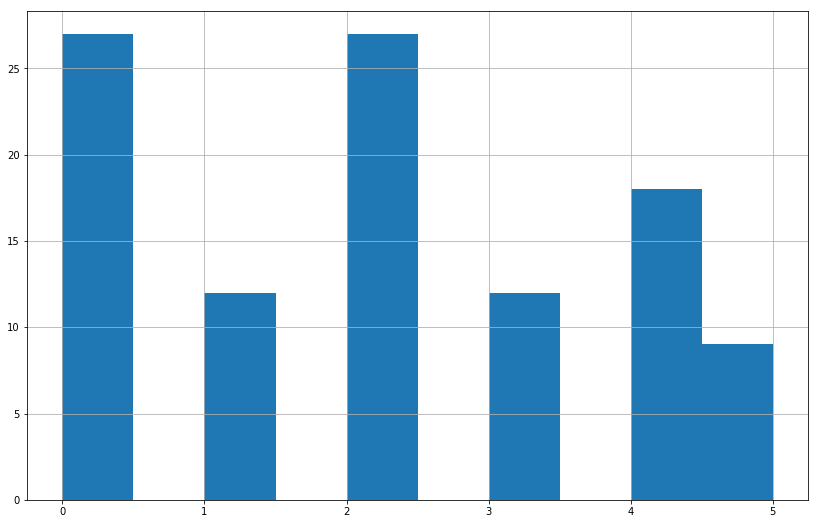

 

cannot plot distplot

 



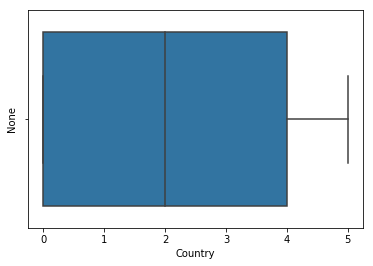


---------------------------   Product_ID   ----------------------------------
null values = 0
is_unique : No
Number of unique values :  5
{1, 2, 3, 4, 5}
Counter({2: 156, 1: 78, 4: 68, 3: 52, 5: 34})
max = 5  min = 1
non zero values = 388   zero values = 0
count    388.000000
mean       2.546392
std        1.236989
min        1.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        5.000000
Name: Product_ID, dtype: float64 

 



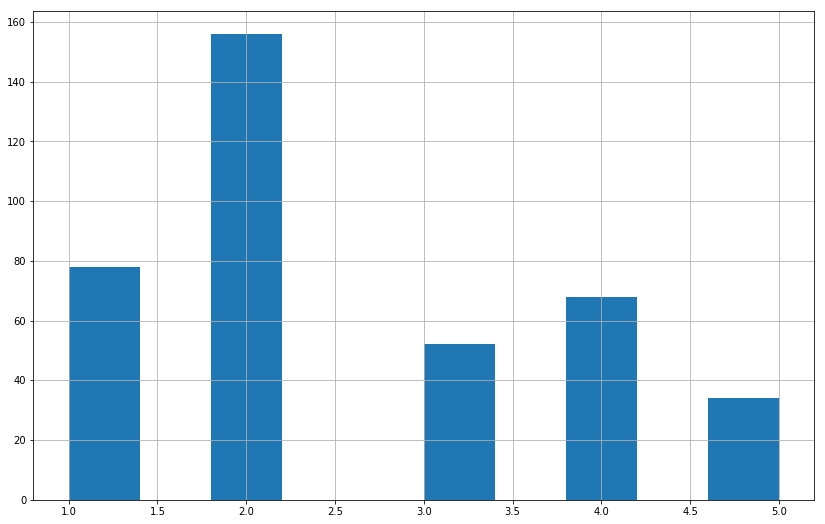

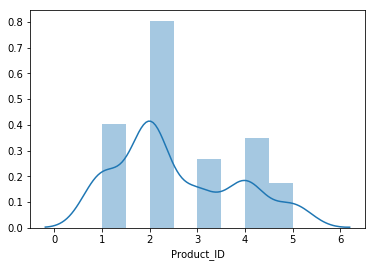

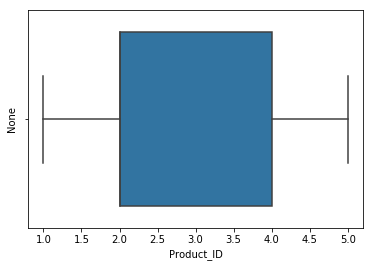

null values = 0
is_unique : No
Number of unique values :  5
{1, 2, 3, 4, 5}
Counter({2: 48, 1: 24, 4: 18, 5: 9, 3: 6})
max = 5  min = 1
non zero values = 105   zero values = 0
count    105.000000
mean       2.428571
std        1.254662
min        1.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        5.000000
Name: Product_ID, dtype: float64 

 



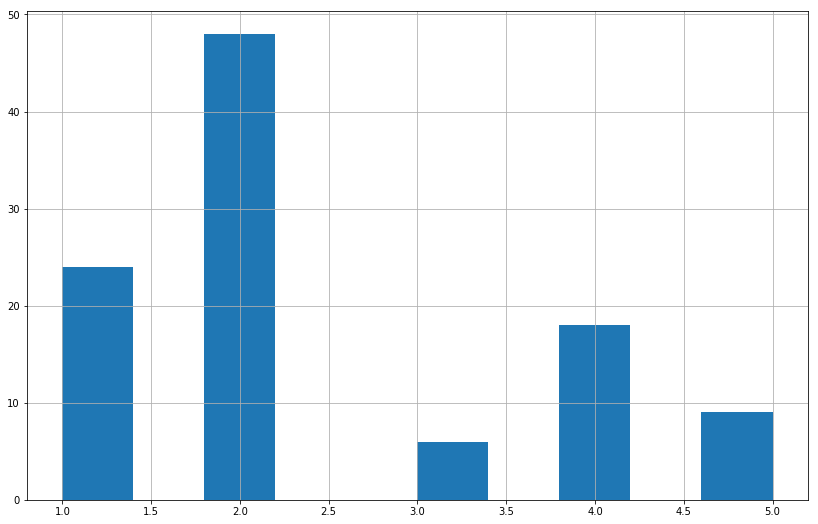

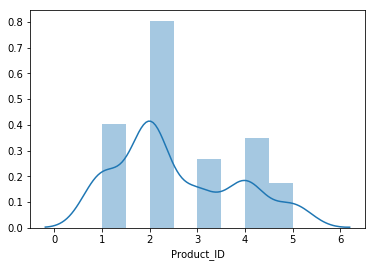

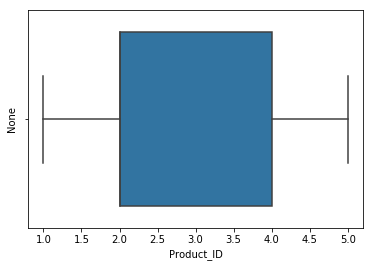


---------------------------   Holiday   ----------------------------------
null values = 0
is_unique : No
Number of unique values :  5
{0, 1, 2, 3, 4}
Counter({0: 125, 1: 119, 2: 108, 3: 28, 4: 8})
max = 4  min = 0
non zero values = 263   zero values = 125
count    388.000000
mean       1.162371
std        1.025225
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: Holiday, dtype: float64 

 



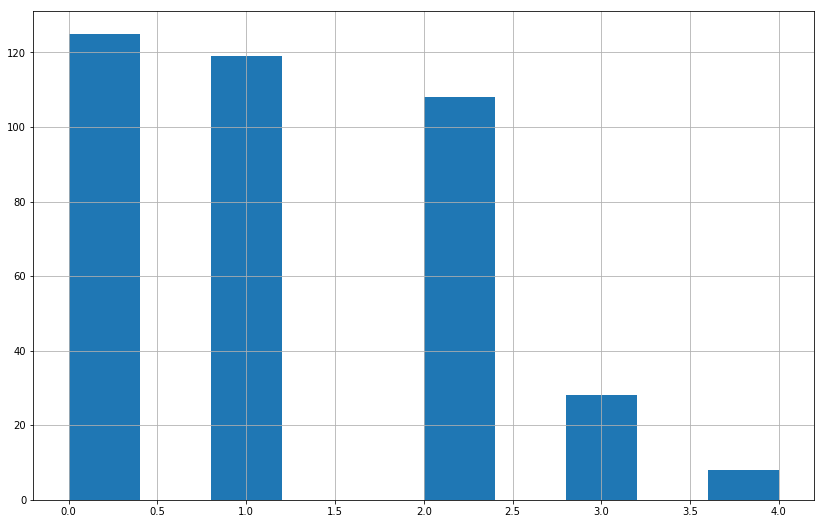

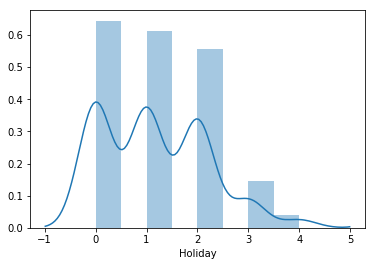

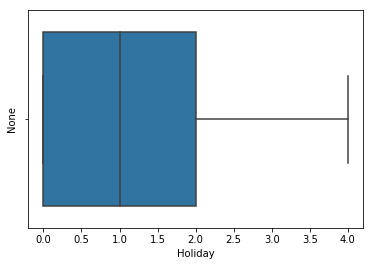

null values = 0
is_unique : No
Number of unique values :  5
{0, 1, 2, 3, 4}
Counter({0: 37, 1: 37, 2: 22, 3: 7, 4: 2})
max = 4  min = 0
non zero values = 68   zero values = 37
count    105.000000
mean       1.047619
std        1.003656
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: Holiday, dtype: float64 

 



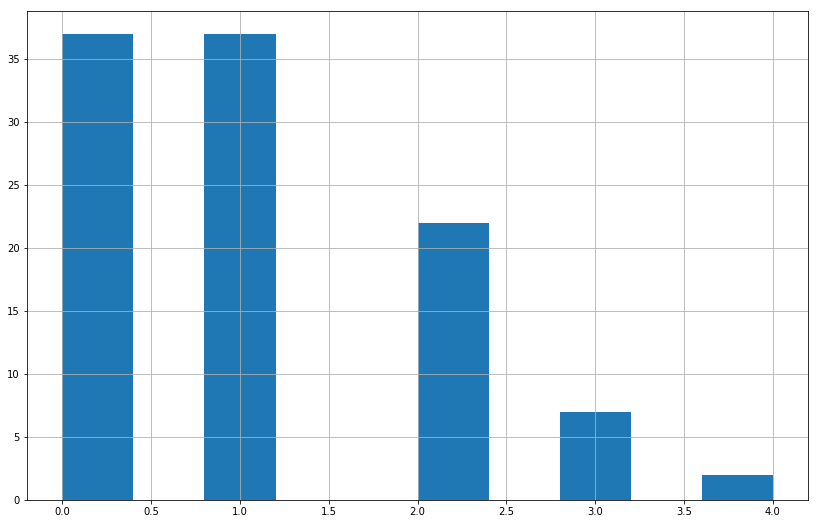

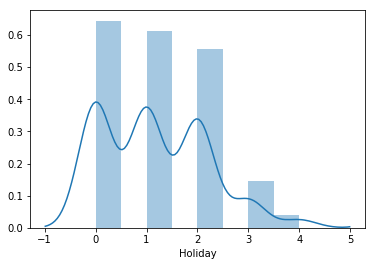

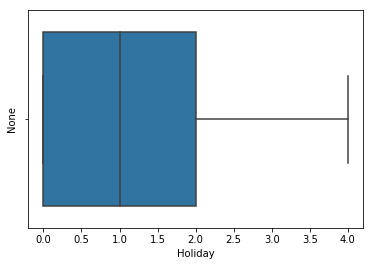


---------------------------   Expense_Price   ----------------------------------
null values = 52
is_unique : Yes
Number of unique values :  388
max = 80201.526  min = 153.179
non zero values = 388   zero values = 0
count      388.000000
mean      8744.248958
std      15633.826778
min        153.179000
25%        594.555250
50%       2042.330500
75%       8744.248958
max      80201.526000
Name: Expense_Price, dtype: float64 

 



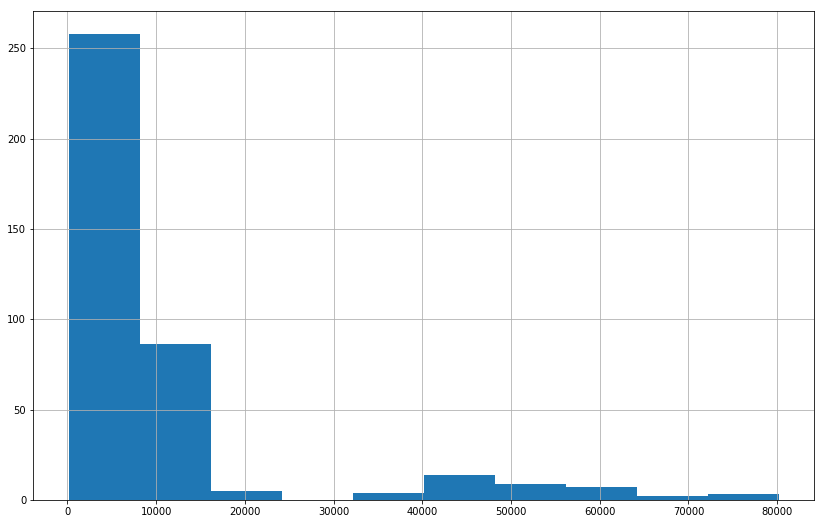

 

cannot plot distplot

 



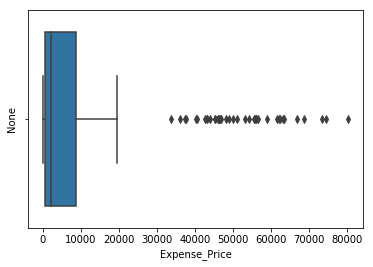

null values = 6
is_unique : Yes
Number of unique values :  105
max = 84161.794  min = 157.756
non zero values = 105   zero values = 0
count      105.000000
mean     10903.653293
std      21855.702896
min        157.756000
25%        765.271000
50%       3087.389000
75%       7377.587000
max      84161.794000
Name: Expense_Price, dtype: float64 

 



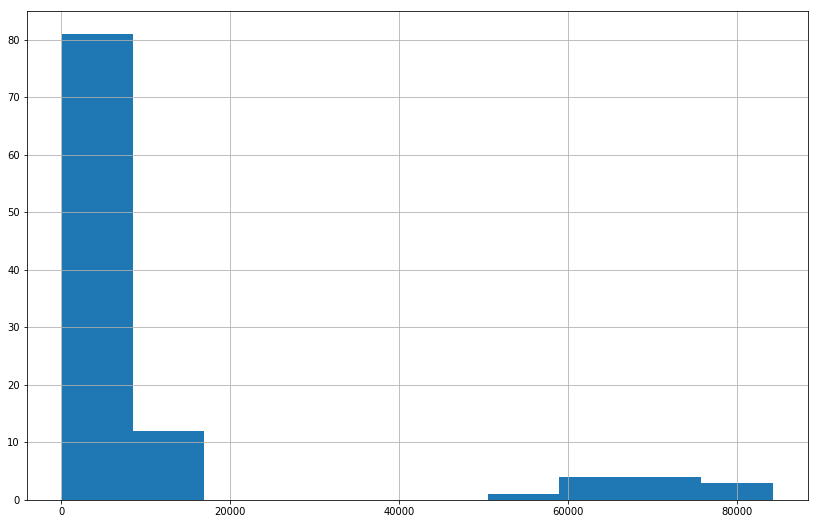

 

cannot plot distplot

 



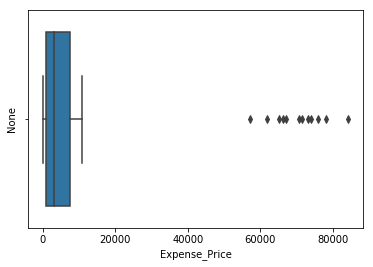

In [28]:
for i in train.columns:
    if i not in ['Sales']:
        print('\n---------------------------  ',i,'  ----------------------------------')
        describe(data=train,x=i)
        try:
            describe(data=test,x=i)
        except:
            pass

In [21]:
train[train['Year']==2015]

,Year,Month,Country,Product_ID,Sales,Holiday,Expense_Price,expense_sales_ratio
220,2015,1,Argentina,1,4.658062e+07,1,16242.659,0.000349
221,2015,1,Argentina,2,5.899550e+06,1,2612.940,0.000443
222,2015,1,Argentina,3,1.260000e+05,1,NaN,NaN
223,2015,1,Belgium,2,7.681684e+05,1,428.642,0.000558
224,2015,1,Columbia,1,7.429676e+06,2,1726.867,0.000232
225,2015,1,Columbia,2,1.353320e+07,2,3224.534,0.000238
226,2015,1,Columbia,3,3.181314e+05,2,NaN,NaN
227,2015,1,Denmark,2,1.338564e+08,1,56134.354,0.000419
228,2015,1,England,4,1.952010e+05,1,188.135,0.000964
229,2015,1,England,5,6.255232e+05,1,385.360,0.000616


In [22]:
test[test['Year']==2015]

,Year,Month,Country,Product_ID,Holiday,Expense_Price
0,2015,11,England,4,0,171.166
1,2015,11,England,5,0,416.969
2,2015,11,Finland,4,0,1306.731
3,2015,12,England,4,3,194.468
4,2015,12,England,5,3,464.351
5,2015,12,Finland,4,4,1499.447
